In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [83]:
data_4.shape

(18565, 10)

In [84]:
data_4 = data_4.loc[data_4.median_house_value != max(data_4.median_house_value),:]

In [85]:
round(data_4.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17697.0,-119.56,2.01,-124.35,-121.76,-118.51,-117.99,-114.31
latitude,17697.0,35.65,2.15,32.54,33.93,34.27,37.73,41.95
housing_median_age,17697.0,28.38,12.49,1.00,18.00,28.00,37.00,52.00
total_rooms,17697.0,2617.42,2193.76,2.00,1434.00,2108.00,3114.00,39320.00
total_bedrooms,17515.0,539.48,424.84,2.00,297.00,435.00,647.00,6445.00
population,17697.0,1441.37,1153.68,3.00,795.00,1178.00,1746.00,35682.00
households,17697.0,501.10,385.22,2.00,281.00,410.00,606.00,6082.00
median_income,17697.0,3.67,1.56,0.50,2.52,3.45,4.58,15.00
median_house_value,17697.0,192227.98,97738.09,14999.00,116300.00,173400.00,247800.00,500000.00


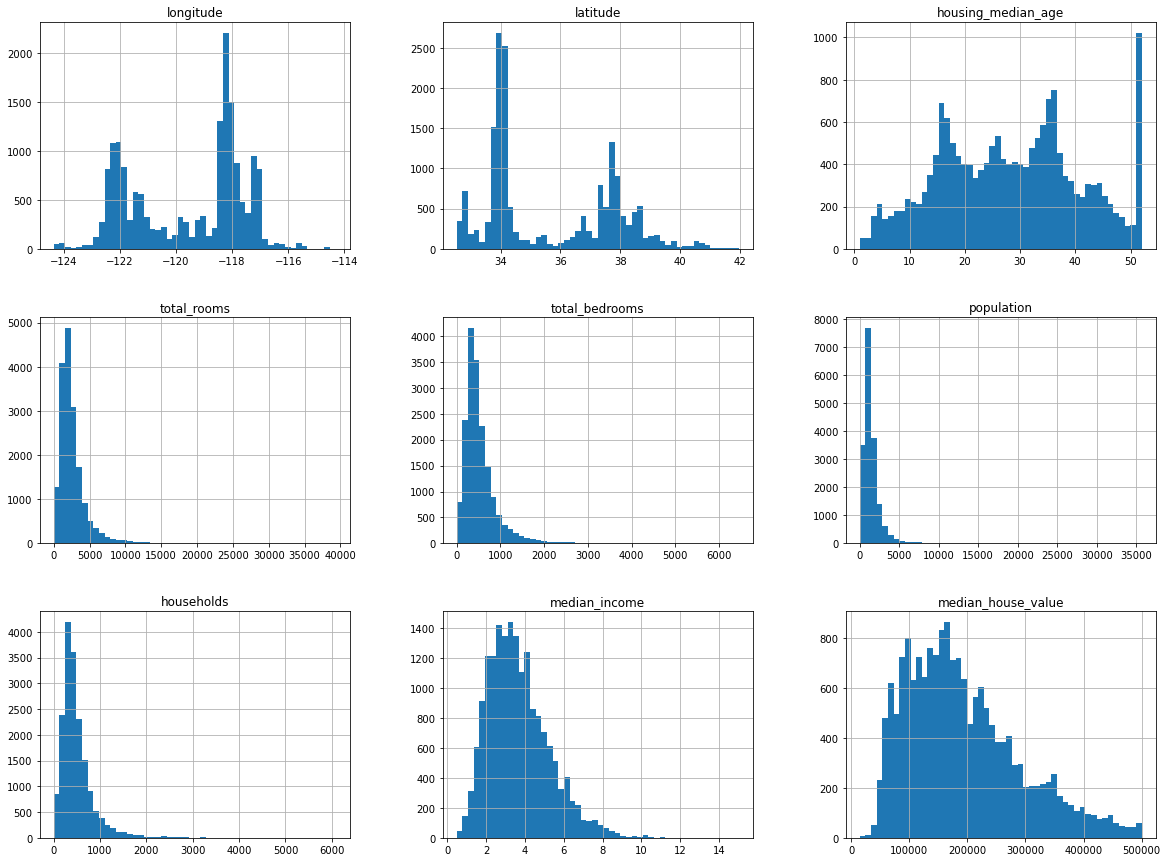

In [86]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

In [87]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17515 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


As we can see all the columns have complete columns except for total_rooms which has 18376 non-null values against the total of 18565 non-null elements. We can replace this with something else. We can take any of the following approaches:
- Replace by the average values
- Take the ratio of mean total bedrooms to mean total rooms for non null values and multiply the ratio by the number of rooms

We will be taking the second approach. 

In [88]:
mean_total_rooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_rooms'].mean(),0)
print(f"Average number of total rooms in non null columns {mean_total_rooms}")
mean_total_bedrooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean(),0)
print(f"Average number of total bed rooms in non null columns {mean_total_bedrooms}")
print(f"Ratio of the number of bedrooms to number of total rooms = {mean_total_bedrooms/mean_total_rooms}")

Average number of total rooms in non null columns 2619.0
Average number of total bed rooms in non null columns 539.0
Ratio of the number of bedrooms to number of total rooms = 0.2058037418862161


Now we multiply the number of rooms in null columns of total bedrooms with 0.20418 and round it to arrive at the total number of bedrooms in the null columns.

In [89]:
data_4.loc[data_4.total_bedrooms.isnull(),'total_bedrooms'] = round(data_4.loc[data_4.total_bedrooms.isnull(),
                                                                         'total_rooms']*mean_total_bedrooms/mean_total_rooms,0)

In [90]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


Now we can see there is no null column in the data and all the data points are complete. Next step will be creation of dummy variables from ```ocean_proximities``` which is a categorical variables. 

In [91]:
data_4_dummies = pd.get_dummies(data_4,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [92]:
data_4_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17697 non-null  float64
 1   latitude                    17697 non-null  float64
 2   housing_median_age          17697 non-null  int64  
 3   total_rooms                 17697 non-null  int64  
 4   total_bedrooms              17697 non-null  float64
 5   population                  17697 non-null  int64  
 6   households                  17697 non-null  int64  
 7   median_income               17697 non-null  float64
 8   median_house_value          17697 non-null  int64  
 9   ocean_proximity_INLAND      17697 non-null  uint8  
 10  ocean_proximity_ISLAND      17697 non-null  uint8  
 11  ocean_proximity_NEAR BAY    17697 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  17697 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Now remember we cannot standardize the variables before train-test-split, because we will be carrying the impact of train dataset into test dataset. Therefore, we will be splitting the data into train and test before running the ```StandardScaler```

In [94]:
x_variables = data_4_dummies.loc[:,data_4_dummies.columns!='median_house_value']
y_variables = data_4_dummies.loc[:,data_4_dummies.columns == 'median_house_value']

In [95]:
print(y_variables.head())
print(x_variables.head())

   median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_variables,y_variables, test_size = 0.20, random_state = 1)

Now we standardize the columns. However, we will not be standardizing the dummy variables because their values are 0/1 already. 

In [97]:
x_train.loc[:,[col for col in x_train.columns if 'ocean_proximity' not in col ]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14344,-122.44,37.72,52,1380,272.0,847,284,3.7143
699,-122.10,37.65,31,1797,327.0,796,319,4.4427
50,-122.28,37.82,52,945,243.0,576,220,1.4113
11772,-121.35,38.56,16,2278,370.0,1203,371,5.0622
16016,-121.89,37.39,2,1136,365.0,535,257,4.3750
...,...,...,...,...,...,...,...,...
11490,-121.42,38.62,41,1087,272.0,462,219,2.0224
18142,-119.17,34.29,18,3932,724.0,1896,680,5.2953
5409,-117.76,34.05,36,3839,1004.0,4711,942,2.3859
12711,-117.07,32.75,14,3073,851.0,2000,782,2.3824


In [98]:
x_scaler = StandardScaler()
x_train_scaled = x_train.copy(deep = True)

In [99]:
x_train_scaled.loc[:,
                   [col for col in x_train_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_train_scaled.loc[:,
                                   [col for col in x_train_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [100]:
x_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,14157.0,-2.214392e-15,1.000035,-2.387681,-1.096863,0.527874,0.782050,2.616108
latitude,14157.0,4.035293e-16,1.000035,-1.446501,-0.800553,-0.642551,0.965347,2.926426
housing_median_age,14157.0,6.223585e-17,1.000035,-2.192778,-0.830361,-0.028939,0.692341,1.894474
total_rooms,14157.0,2.158179e-17,1.000035,-1.180517,-0.535682,-0.233317,0.227215,16.536900
total_bedrooms,14157.0,-5.822064e-17,1.000035,-1.256651,-0.570105,-0.245513,0.256553,13.788986
population,14157.0,6.323966e-17,1.000035,-1.233388,-0.554472,-0.224859,0.256289,29.312698
households,14157.0,-2.710271e-17,1.000035,-1.284866,-0.567968,-0.239069,0.269696,14.337840
median_income,14157.0,-3.011412e-17,1.000035,-2.035058,-0.736271,-0.143225,0.579038,6.095812
ocean_proximity_INLAND,14157.0,3.340397e-01,0.471670,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,14157.0,2.119093e-04,0.014556,0.000000,0.000000,0.000000,0.000000,1.000000


In [101]:
x_test_scaled = x_test.copy(deep = True)
x_test_scaled.loc[:,
                   [col for col in x_test_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_test_scaled.loc[:,
                                   [col for col in x_test_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [102]:
x_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,3540.0,-3.322891e-15,1.000141,-2.341622,-1.103965,0.513358,0.790613,2.499104
latitude,3540.0,2.175786e-15,1.000141,-1.448145,-0.800731,-0.637714,0.955202,2.930045
housing_median_age,3540.0,1.374920e-16,1.000141,-2.188676,-0.832263,-0.034372,0.683729,1.880564
total_rooms,3540.0,1.023663e-16,1.000141,-1.239126,-0.556852,-0.226487,0.225130,12.017580
total_bedrooms,3540.0,-5.218675e-17,1.000141,-1.307454,-0.580665,-0.244280,0.259070,8.946163
population,3540.0,1.204310e-17,1.000141,-1.301677,-0.585151,-0.240597,0.293142,12.433877
households,3540.0,-1.806465e-17,1.000141,-1.334660,-0.584426,-0.234046,0.278308,9.690453
median_income,3540.0,3.010774e-17,1.000141,-2.007323,-0.723343,-0.139015,0.595021,7.086919
ocean_proximity_INLAND,3540.0,3.293785e-01,0.470054,0.000000,0.000000,0.000000,1.000000,1.000000
ocean_proximity_ISLAND,3540.0,5.649718e-04,0.023766,0.000000,0.000000,0.000000,0.000000,1.000000


Now we have scaled the relevant columns, we can start running the model. We also need to scale the output columns as well. 

In [103]:
y_train_scaled = y_train.copy(deep = True)
y_train_scaled.loc[:,:]= x_scaler.fit_transform(y_train_scaled)

In [104]:
y_train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,14157.0,-2.810651e-17,1.000035,-1.819153,-0.776208,-0.188334,0.569415,3.174179


In [105]:
y_test_scaled = y_test.copy(deep = True)
y_test_scaled.loc[:,:] = x_scaler.fit_transform(y_test_scaled)

In [106]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3540.0,194368.107345,100106.139616,17500.0,115950.0,173950.0,251150.0,500000.0


In [107]:
y_test_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,3540.0,4.014366e-17,1.000141,-1.767055,-0.78346,-0.203993,0.567297,3.05351


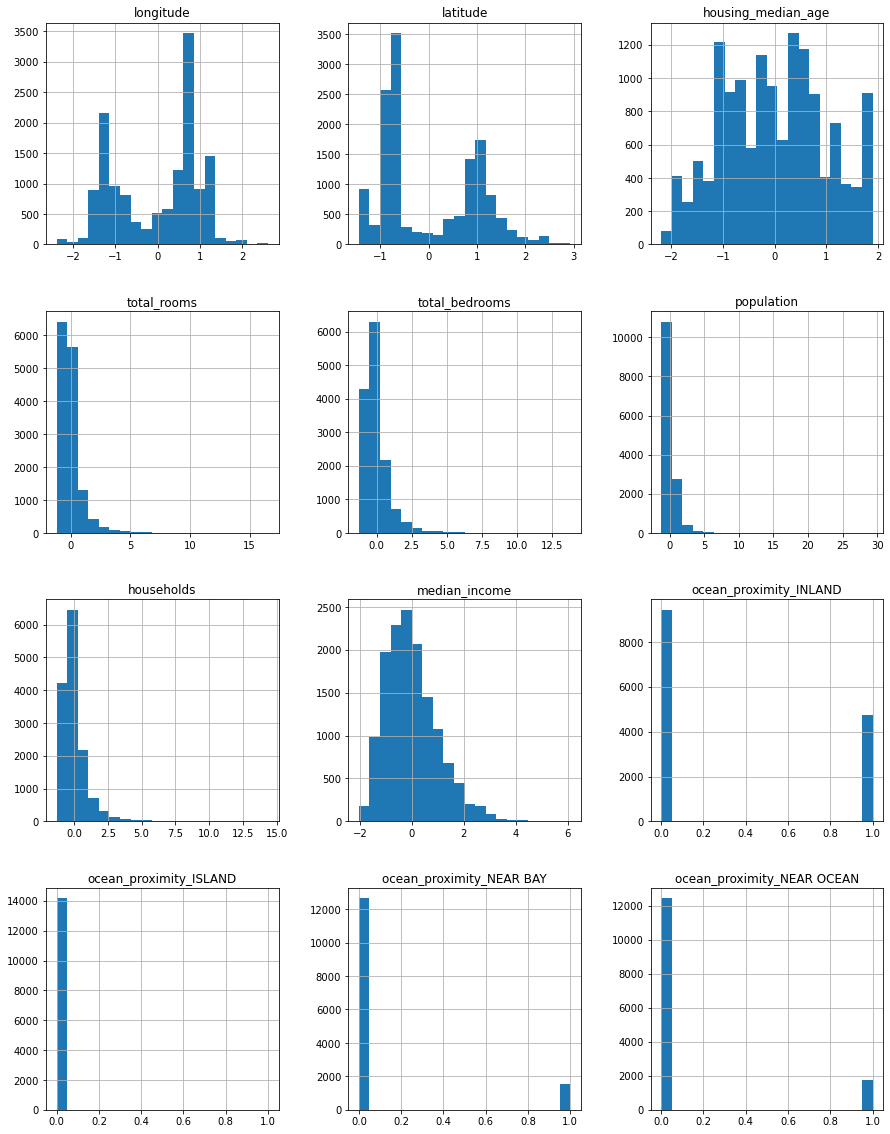

In [108]:
x_train_scaled.hist(bins = 20, figsize=(15,20))
plt.show()

In [109]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     7709
INLAND        5895
NEAR OCEAN    2208
NEAR BAY      1880
ISLAND           5
Name: ocean_proximity, dtype: int64

### Building the models
<br>We will attempt running following type of models:
1. Linear Regression Model (simple regression model)
2. LASSO Regression to remove multi collinearity
3. Decision Trees including Random Forest
4. Deep Learning Model

#### Linear Regression
We will start building the linear regression model. 

In [110]:
import statsmodels.api as sm

In [111]:
x_train_scaled = sm.add_constant(x_train_scaled)
model_1 = sm.OLS(y_train_scaled,x_train_scaled).fit()

In [112]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.610     
Dependent Variable:   median_house_value   AIC:                  26841.4758
Date:                 2022-07-17 08:53     BIC:                  26939.7294
No. Observations:     14157                Log-Likelihood:       -13408.   
Df Model:             12                   F-statistic:          1850.     
Df Residuals:         14144                Prob (F-statistic):   0.00      
R-squared:            0.611                Scale:                0.38953   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.1351   0.0093  14.5208 0.0000  0.1168  0.1533
longitude                  -0.4966   0.0220 -22.5285 0.0000 -0.5398 -0.4534
latitude                   -0.4897   0.0232 -21.0930 0.0000 -0.5352 -0.4442
housing_median_age          0.1206   0.0061  19.6672 0.0000  0.1086  0.1326
total_rooms                -0.1584   0.0198  -7.9828 0.0000 -0.1973 -0.1195
total_bedrooms              0.3597   0.0308  11.6941 0.0000  0.2994  0.4200
population                 -0.3433   0.0131 -26.1724 0.0000 -0.3691 -0.3176
households                  0.1934   0.0294   6.5839 0.0000  0.1358  0.2510
median_income               0.6144   0.0072  85.7891 0.0000  0.6004  0.6285
ocean_proximity_INLAND     -0.3992   0.0187 -21.3416 0.0000 -0.4358 -0.3625
ocean_proximity_ISLAND      1.7812   0.3607   4.9386 0.0000  1.0743  2.4882
ocean_proximity_NEAR BAY   -0.0656   0.0211  -3.1122 0.0019 -0.1069 -0.0243
ocean_proximity_NEAR OCEAN  0.0401   0.0175   2.2963 0.0217  0.0059  0.0743
---------------------------------------------------------------------------
Omnibus:                3061.311         Durbin-Watson:            1.979   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         9455.632
Skew:                   1.110            Prob(JB):                 0.000   
Kurtosis:               6.332            Condition No.:            136     
===========================================================================

"""

<Figure size 720x576 with 0 Axes>

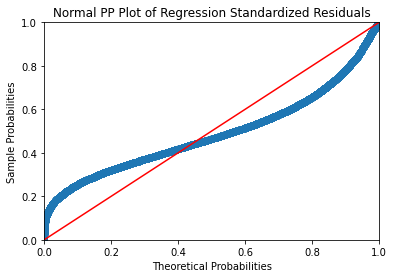

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
house_price_data_resid = model_1.resid
probplot = sm.ProbPlot(house_price_data_resid)
plt.figure(figsize = (10,8))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

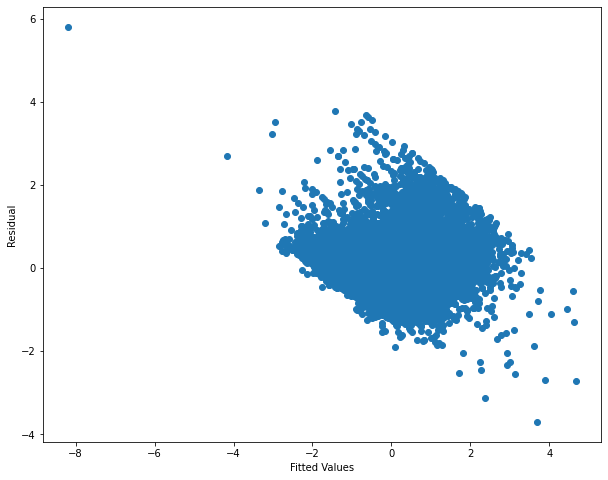

In [114]:
def standardized(vals):
    return((vals-vals.mean())/vals.std())
plt.figure(figsize = (10,8))
plt.scatter(standardized(model_1.fittedvalues),model_1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

R2 Score 0.6200742358459739


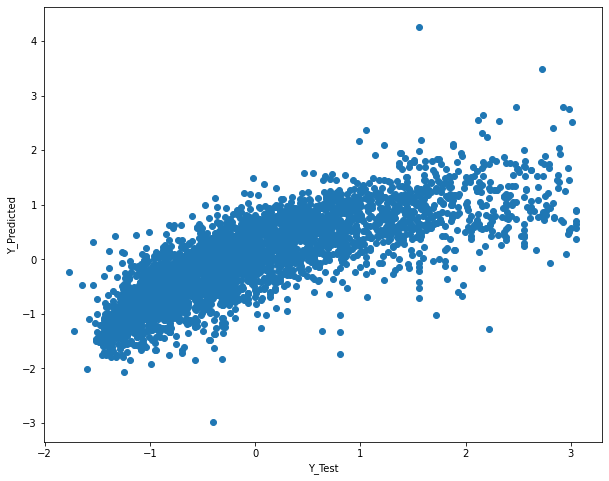

In [115]:
pred = model_1.predict(sm.add_constant(x_test_scaled))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test_scaled,pred))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

We can see at the higher value of Y_test we can see that there is the regression is not working well, for remaining portion is working fine. 

In [116]:
x_test_scaled.loc[y_test_scaled.median_house_value ==max(y_test_scaled.median_house_value),:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9666,0.855555,-0.959091,0.524151,-0.479767,-0.337584,-0.594290,-0.234046,0.887491,0,0,0,0
12953,1.150295,-1.345676,0.763518,-0.638246,-0.479995,-0.905029,-0.670496,0.401301,0,0,0,1
7460,0.710683,-0.903200,0.045417,0.068447,0.423580,-0.341130,0.416563,-0.047321,0,0,0,1
4244,0.600780,-0.744840,-0.273739,-0.020129,0.308178,-0.227802,0.375900,-0.090847,0,0,0,0
15182,-1.392460,0.894653,1.880564,-0.197281,-0.428433,-0.470909,-0.380433,0.438744,0,0,0,1
13000,1.150295,-1.317730,0.444362,-0.099608,0.288535,-0.456286,0.329815,0.018909,0,0,0,1


In [117]:
data_4.loc[data_4.median_house_value == max(data_4.median_house_value),:].ocean_proximity.value_counts()

NEAR OCEAN    8
NEAR BAY      7
<1H OCEAN     6
INLAND        1
Name: ocean_proximity, dtype: int64

In [118]:
data_4.median_house_value.value_counts()

137500    112
162500    109
112500     97
187500     87
225000     83
         ... 
454300      1
365300      1
262200      1
300700      1
47000       1
Name: median_house_value, Length: 3758, dtype: int64

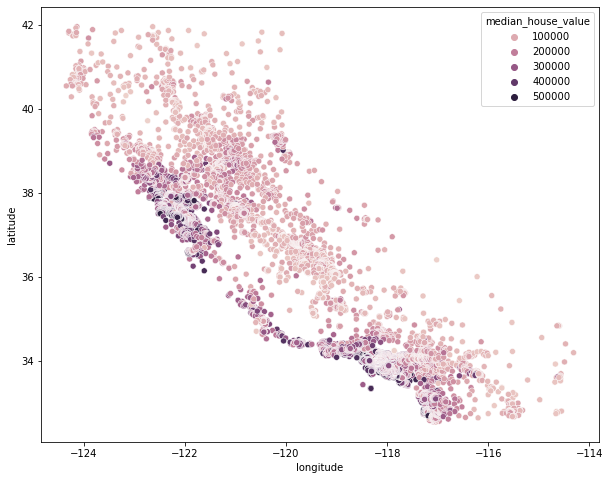

In [119]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.scatterplot(data = data_4,x = 'longitude',y = 'latitude',hue = 'median_house_value')
plt.show()

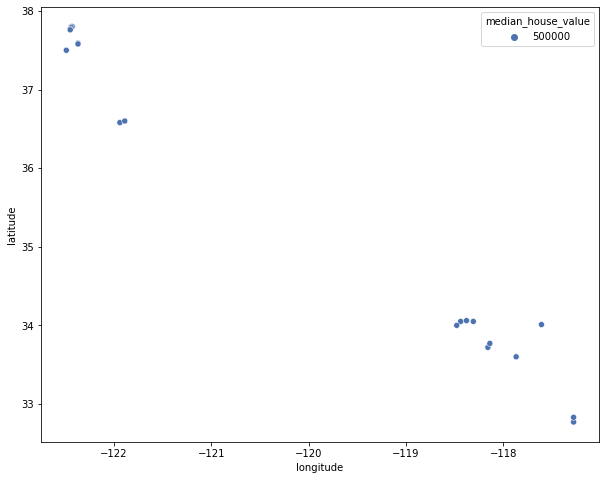

In [120]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = data_4.loc[data_4.median_house_value == max(data_4.median_house_value),:],
               x = 'longitude',y = 'latitude',hue = 'median_house_value',palette="deep")
plt.show()

In [121]:
print(model_1.params)

const                         0.135063
longitude                    -0.496567
latitude                     -0.489722
housing_median_age            0.120619
total_rooms                  -0.158368
total_bedrooms                0.359688
population                   -0.343349
households                    0.193425
median_income                 0.614448
ocean_proximity_INLAND       -0.399174
ocean_proximity_ISLAND        1.781220
ocean_proximity_NEAR BAY     -0.065591
ocean_proximity_NEAR OCEAN    0.040101
dtype: float64


These are the parameters for the model to predict the values of the median house prices. 

In [122]:
y_pred = model_1.predict(sm.add_constant(x_test_scaled))

In [123]:
from sklearn.metrics import r2_score,mean_squared_error

In [124]:
np.abs(r2_score(y_test_scaled,y_pred))

0.6200742358459739

In [125]:
y_predict_actual = y_pred.iloc[:]*np.std(y_test)[0] + np.mean(y_test,axis=0)[0]

In [126]:
np.sqrt(mean_squared_error(y_test,y_predict_actual))

61694.82507068506

R2 Score 0.6200742358459739


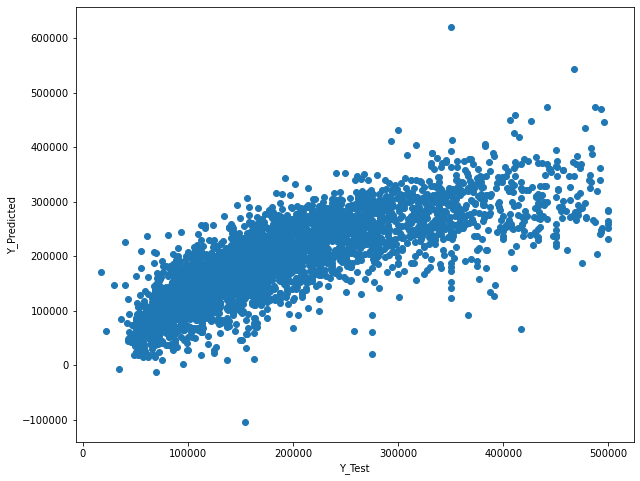

In [127]:
pred = model_1.predict(sm.add_constant(x_test_scaled))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_predict_actual))
plt.figure(figsize = (10,8))
plt.scatter(y_test,y_predict_actual)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

Testing for multi-collinearity 

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF']  = vif
    return vif_factors

In [129]:
x_variables.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [130]:
vif_factors = get_vif_factors(x_variables)

In [131]:
vif_factors

,column,VIF
0,longitude,834.760716
1,latitude,796.573065
2,housing_median_age,8.366069
3,total_rooms,33.959803
4,total_bedrooms,91.428761
5,population,16.329372
6,households,85.787843
7,median_income,11.967227
8,ocean_proximity_INLAND,2.816699
9,ocean_proximity_ISLAND,1.002085


In [132]:
vif_factors[vif_factors.VIF>4].column

0             longitude
1              latitude
2    housing_median_age
3           total_rooms
4        total_bedrooms
5            population
6            households
7         median_income
Name: column, dtype: object

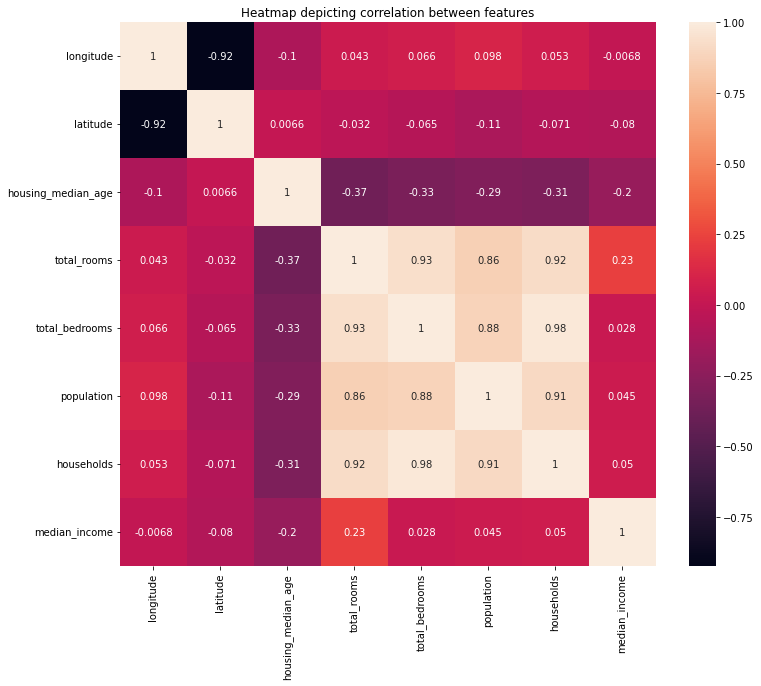

In [133]:
plt.figure(figsize = (12,10))
sns.heatmap(x_variables[vif_factors[vif_factors.VIF>4].column].corr(),annot = True)
plt.title("Heatmap depicting correlation between features")
plt.show()

We can see that following variables are highly correlated:
- Population - total_rooms, total_bedrooms, households
- Longitude - latitude
- Housing_median_age - total_rooms, total_bedrooms, population, households

We can keep the following columns and remove the remaining columns due to high ```vif_factor```. We can keep the following columns:
- population, housing_median_age, longitude, median_income, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR BAY, ocean_proximity_NEAR OCEAN

We can see variables - total_bedrooms and total_rooms are highly correlated households, should be correlated with the population. 

In [134]:
columns_select = x_variables[vif_factors[vif_factors.VIF <= 4].column].columns

In [135]:
type(columns_select)

pandas.core.indexes.base.Index

In [136]:
columns_select

Index(['ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [137]:
len(columns_select)

4

In [138]:
columns_add = ['population','housing_median_age','longitude','median_income']

In [139]:
type(columns_add)

list

In [140]:
columns_final = list(columns_select) + columns_add

In [141]:
columns_final

['ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'population',
 'housing_median_age',
 'longitude',
 'median_income']

In [142]:
x_test_scaled_2 = x_test_scaled[columns_final]
x_train_scaled_2 = x_train_scaled[columns_final]

In [143]:
x_train_scaled_2 = sm.add_constant(x_train_scaled_2)
model_2 = sm.OLS(y_train_scaled,x_train_scaled_2).fit()

In [144]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.562     
Dependent Variable:   median_house_value   AIC:                  28489.0978
Date:                 2022-07-17 08:53     BIC:                  28557.1194
No. Observations:     14157                Log-Likelihood:       -14236.   
Df Model:             8                    F-statistic:          2274.     
Df Residuals:         14148                Prob (F-statistic):   0.00      
R-squared:            0.563                Scale:                0.43773   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.2165   0.0089  24.4171 0.0000  0.1991  0.2339
ocean_proximity_INLAND     -0.7119   0.0139 -51.1787 0.0000 -0.7391 -0.6846
ocean_proximity_ISLAND      2.0315   0.3822   5.3157 0.0000  1.2824  2.7806
ocean_proximity_NEAR BAY    0.0243   0.0222   1.0974 0.2725 -0.0191  0.0678
ocean_proximity_NEAR OCEAN  0.1480   0.0181   8.1956 0.0000  0.1126  0.1834
population                  0.0153   0.0059   2.6168 0.0089  0.0038  0.0268
housing_median_age          0.1007   0.0063  15.8674 0.0000  0.0883  0.1131
longitude                  -0.0515   0.0065  -7.9737 0.0000 -0.0642 -0.0388
median_income               0.5871   0.0059  98.8738 0.0000  0.5755  0.5987
---------------------------------------------------------------------------
Omnibus:                2854.108         Durbin-Watson:            1.982   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         6933.895
Skew:                   1.122            Prob(JB):                 0.000   
Kurtosis:               5.591            Condition No.:            82      
===========================================================================

"""

In [145]:
columns_final.remove('longitude')

In [146]:
x_test_scaled_3 = x_test_scaled[columns_final]
x_train_scaled_3 = x_train_scaled[columns_final]

In [148]:
x_train_scaled_3 = sm.add_constant(x_train_scaled_3)
model_3 = sm.OLS(y_train_scaled,x_train_scaled_3).fit()

In [149]:
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.560     
Dependent Variable:   median_house_value   AIC:                  28550.5756
Date:                 2022-07-17 08:53     BIC:                  28611.0393
No. Observations:     14157                Log-Likelihood:       -14267.   
Df Model:             7                    F-statistic:          2579.     
Df Residuals:         14149                Prob (F-statistic):   0.00      
R-squared:            0.561                Scale:                0.43967   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.1979   0.0086  23.0835 0.0000  0.1811  0.2147
ocean_proximity_INLAND     -0.6879   0.0136 -50.5401 0.0000 -0.7146 -0.6612
ocean_proximity_ISLAND      2.0178   0.3830   5.2682 0.0000  1.2670  2.7685
ocean_proximity_NEAR BAY    0.1107   0.0194   5.7081 0.0000  0.0727  0.1487
ocean_proximity_NEAR OCEAN  0.1588   0.0180   8.8019 0.0000  0.1235  0.1942
population                  0.0125   0.0059   2.1334 0.0329  0.0010  0.0240
housing_median_age          0.1016   0.0064  15.9739 0.0000  0.0891  0.1140
median_income               0.5891   0.0059  99.0687 0.0000  0.5774  0.6007
---------------------------------------------------------------------------
Omnibus:                2805.479         Durbin-Watson:            1.980   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         6678.729
Skew:                   1.112            Prob(JB):                 0.000   
Kurtosis:               5.525            Condition No.:            81      
===========================================================================

"""

In [150]:
data_4.shape

(17697, 10)

In [159]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(14157, 13)
(14157, 1)


In [178]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=4).fit(x_train_scaled.iloc[:,1:],y_train_scaled)
print(f"Value for Train Data Set {mse(knn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled,squared = False)}")
print(f"Value for Test Data Set {mse(knn.predict(x_test_scaled),y_test_scaled, squared = False)}")

Value for Train Data Set 0.44309280961828357
Value for Test Data Set 0.5802873783482804


In [174]:
knn.predict(x_train_scaled.iloc[:,1:])

array([[ 0.71423895],
       [ 0.26741386],
       [-1.11904799],
       ...,
       [-0.57098374],
       [-0.5404404 ],
       [-0.98726548]])

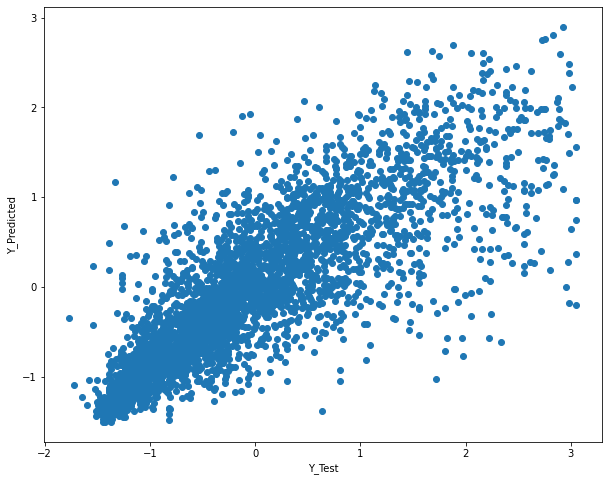

In [179]:
#print("R2 Score",r2_score(y_test,y_predict_actual))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,knn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [181]:
print("R2 Score",round(r2_score(y_test_scaled,knn.predict(x_test_scaled)),3))

R2 Score 0.663


In [182]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rfr = RandomForestRegressor(max_depth = 2).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())
print(mse(rfr.predict(x_train_scaled.iloc[:,1:]),y_train_scaled,squared = False))
print(mse(rfr.predict(x_test_scaled),y_test_scaled,squared = False))

0.7252387262510679
0.7318480527909466


In [188]:
print("R2 Score",round(r2_score(y_test_scaled,rfr.predict(x_test_scaled)),3))

R2 Score 0.466


In [195]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 400).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())
print(mse(gbr.predict(x_train_scaled.iloc[:,1:]),y_train_scaled,squared = False))
print(mse(gbr.predict(x_test_scaled),y_test_scaled,squared = False))

0.40900236326138173
0.47463738852864007


In [198]:
print("R2 Score",round(r2_score(y_test_scaled,gbr.predict(x_test_scaled)),3))

R2 Score 0.775


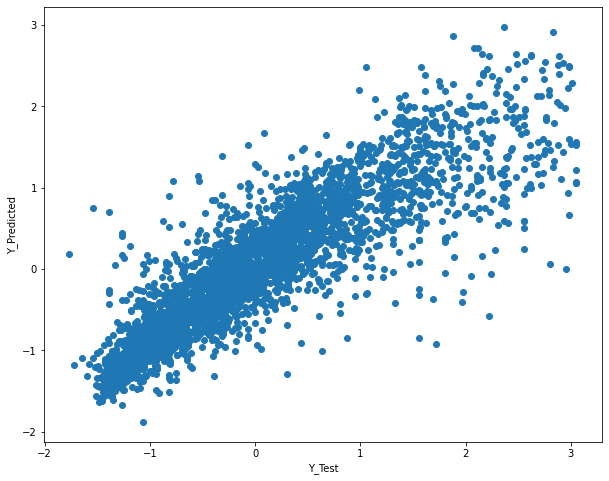

In [209]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,gbr.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [202]:
simple_nn = Sequential()
simple_nn.add(InputLayer(x_train_scaled.iloc[:,1:].shape[1],))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

Metal device set to: Apple M1 Pro


2022-07-17 11:35:31.872174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-17 11:35:31.872592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [203]:
opt = Adam()
cp = ModelCheckpoint('models/simple_nn',save_best_only = True)

In [204]:
simple_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
simple_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)

Epoch 1/100


2022-07-17 11:38:29.005277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-17 11:38:29.223478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.7896 - root_mean_squared_error: 0.8886

2022-07-17 11:38:33.321435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-17 11:38:33.710140: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/simple_nn/assets
443/443 [==============================] - 5s 6ms/step - loss: 0.7896 - root_mean_squared_error: 0.8886 - val_loss: 0.5931 - val_root_mean_squared_error: 0.7701
Epoch 2/100
443/443 [==============================] - 3s 6ms/step - loss: 0.5261 - root_mean_squared_error: 0.7254 - val_loss: 0.4774 - val_root_mean_squared_error: 0.6909
Epoch 3/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4601 - root_mean_squared_error: 0.6783 - val_loss: 0.4346 - val_root_mean_squared_error: 0.6592
Epoch 4/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4293 - root_mean_squared_error: 0.6552 - val_loss: 0.4090 - val_root_mean_squared_error: 0.6395
Epoch 5/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4076 - root_mean_squared_error: 0.6385 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6247
Epoch 6/100
443/443 [==============================] - 3s 6ms/step - loss: 0.3926 - root

Epoch 29/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.3546 - val_root_mean_squared_error: 0.5955
Epoch 30/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3548 - root_mean_squared_error: 0.5956 - val_loss: 0.3544 - val_root_mean_squared_error: 0.5953
Epoch 31/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3546 - root_mean_squared_error: 0.5955 - val_loss: 0.3529 - val_root_mean_squared_error: 0.5941
Epoch 32/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3541 - root_mean_squared_error: 0.5951 - val_loss: 0.3531 - val_root_mean_squared_error: 0.5942
Epoch 33/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3544 - root_mean_squared_error: 0.5953 - val_loss: 0.3534 - val_root_mean_squared_error: 0.5945
Epoch 34/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3542 - root_mean_squared_error: 0.5952 - val_loss: 0

Epoch 70/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5930
Epoch 71/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927
Epoch 72/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5936 - val_loss: 0.3515 - val_root_mean_squared_error: 0.5929
Epoch 73/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 74/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 75/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0

In [213]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:24.359862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.4003097908807233
0.3931024149630959


In [208]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.649


2022-07-17 12:01:06.345069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


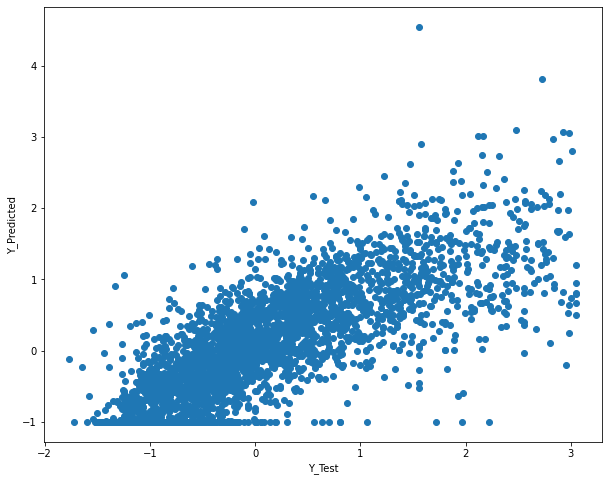

In [215]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,simple_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [212]:
medium_nn = Sequential()
medium_nn.add(InputLayer((x_train_scaled.iloc[:,1:].shape[1],)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/medium_nn',save_best_only = True)
medium_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
medium_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)


Epoch 1/100


2022-07-17 11:54:46.850920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.4765 - root_mean_squared_error: 0.6903

2022-07-17 11:54:50.296349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/medium_nn/assets
443/443 [==============================] - 4s 8ms/step - loss: 0.4765 - root_mean_squared_error: 0.6903 - val_loss: 0.4334 - val_root_mean_squared_error: 0.6583
Epoch 2/100
443/443 [==============================] - 3s 7ms/step - loss: 0.4143 - root_mean_squared_error: 0.6436 - val_loss: 0.3372 - val_root_mean_squared_error: 0.5807
Epoch 3/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3733 - root_mean_squared_error: 0.6110 - val_loss: 0.3926 - val_root_mean_squared_error: 0.6266
Epoch 4/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3812 - root_mean_squared_error: 0.6174 - val_loss: 0.4501 - val_root_mean_squared_error: 0.6709
Epoch 5/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3862 - root_mean_squared_error: 0.6214 - val_loss: 0.3477 - val_root_mean_squared_error: 0.5897
Epoch 6/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3907 - root

Epoch 47/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4111 - root_mean_squared_error: 0.6411 - val_loss: 0.3798 - val_root_mean_squared_error: 0.6163
Epoch 48/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4031 - root_mean_squared_error: 0.6349 - val_loss: 0.3721 - val_root_mean_squared_error: 0.6100
Epoch 49/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4124 - root_mean_squared_error: 0.6422 - val_loss: 0.3776 - val_root_mean_squared_error: 0.6145
Epoch 50/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4182 - root_mean_squared_error: 0.6467 - val_loss: 0.3784 - val_root_mean_squared_error: 0.6152
Epoch 51/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3994 - root_mean_squared_error: 0.6320 - val_loss: 0.3920 - val_root_mean_squared_error: 0.6261
Epoch 52/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4100 - root_mean_squared_error: 0.6403 - val_loss: 0

443/443 [==============================] - 2s 5ms/step - loss: 0.4125 - root_mean_squared_error: 0.6423 - val_loss: 0.3761 - val_root_mean_squared_error: 0.6133
Epoch 95/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4062 - root_mean_squared_error: 0.6374 - val_loss: 0.4339 - val_root_mean_squared_error: 0.6587
Epoch 96/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4210 - root_mean_squared_error: 0.6488 - val_loss: 0.4265 - val_root_mean_squared_error: 0.6531
Epoch 97/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4349 - root_mean_squared_error: 0.6594 - val_loss: 0.3911 - val_root_mean_squared_error: 0.6254
Epoch 98/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4274 - root_mean_squared_error: 0.6538 - val_loss: 0.3902 - val_root_mean_squared_error: 0.6246
Epoch 99/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4176 - root_mean_squared_error: 0.6462 - val_loss: 0.4079 - val_r

In [214]:
medium_nn = load_model('models/medium_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:29.600197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.3369767979908277
0.3371900933647524


In [216]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.663


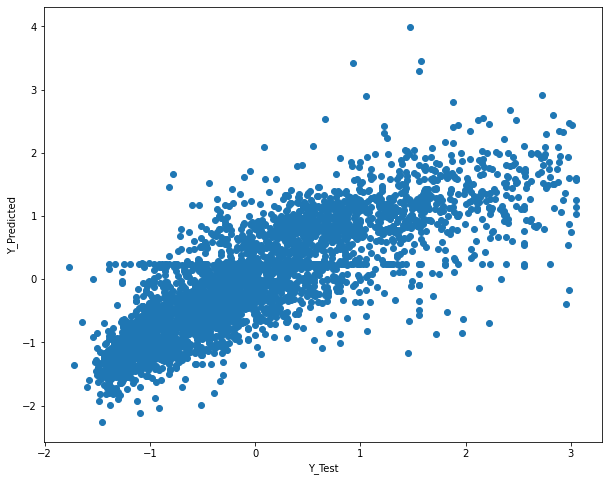

In [217]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,medium_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()